In [49]:
import os

In [7]:
def get_file_paths(base_folder):
    real_images = []
    fake_images = []

    for category in os.listdir(base_folder):
        category_folder = os.path.join(base_folder, category)
        if os.path.isdir(category_folder):
            for image_file in os.listdir(category_folder):
                image_path = os.path.join(category_folder, image_file)
                if category.lower() == 'real':
                    real_images.append(image_path)
                elif category.lower() == 'fake':
                    fake_images.append(image_path)

    return real_images, fake_images

In [9]:
main_folder = 'C:/Users/acer/cifake'

In [10]:
train_real, train_fake = get_file_paths(os.path.join(main_folder, 'train'))
test_real, test_fake = get_file_paths(os.path.join(main_folder, 'test'))

In [13]:
len(train_fake)

50000

In [16]:
len(test_fake)

10000

In [17]:
test_fake[0]

'C:/Users/acer/cifake\\test\\FAKE\\0 (10).jpg'

In [22]:
from skimage import io

In [35]:
import cv2 as cv

In [25]:
img1 = io.imread(test_fake[0])

In [28]:
import matplotlib.pyplot as plt

In [30]:
img1.shape

(32, 32, 3)

In [32]:
def path_to_dataset(path_list):
    img_list=[]
    for image in path_list:
        img=io.imread(image)
        img_list.append(img)
    return img_list

In [33]:
real_train = path_to_dataset(train_real)
real_train[101]

array([[[ 53,  59,  55],
        [ 75,  82,  75],
        [188, 195, 188],
        ...,
        [151, 127, 127],
        [165, 139, 140],
        [148, 122, 123]],

       [[ 50,  54,  53],
        [ 60,  64,  63],
        [181, 185, 184],
        ...,
        [137, 117, 110],
        [146, 123, 115],
        [170, 147, 139]],

       [[ 28,  32,  35],
        [ 64,  68,  71],
        [171, 175, 178],
        ...,
        [129, 112,  92],
        [125, 108,  88],
        [168, 150, 130]],

       ...,

       [[ 94, 121, 116],
        [ 96, 121, 117],
        [100, 120, 118],
        ...,
        [112, 107, 114],
        [114, 107, 115],
        [113, 106, 114]],

       [[102, 105, 110],
        [107, 108, 113],
        [112, 109, 116],
        ...,
        [109, 108, 114],
        [111, 108, 115],
        [112, 109, 116]],

       [[110,  92, 106],
        [116,  95, 110],
        [122,  99, 115],
        ...,
        [103, 104, 109],
        [103, 102, 110],
        [105, 104, 112]]

In [48]:
fake_train = path_to_dataset(train_fake)
fake_test = path_to_dataset(test_fake)
real_test= path_to_dataset(test_real)

In [50]:
import pickle

In [51]:
real_train_file = 'real_train.pkl'
real_test_file = 'real_test.pkl'
fake_train_file = 'fake_train.pkl'
fake_test_file = 'fake_test.pkl'

with open(real_train_file, 'wb') as f:
    pickle.dump(real_train, f)

with open(real_test_file, 'wb') as f:
    pickle.dump(real_test, f)

with open(fake_train_file, 'wb') as f:
    pickle.dump(fake_train, f)

with open(fake_test_file, 'wb') as f:
    pickle.dump(fake_test, f)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

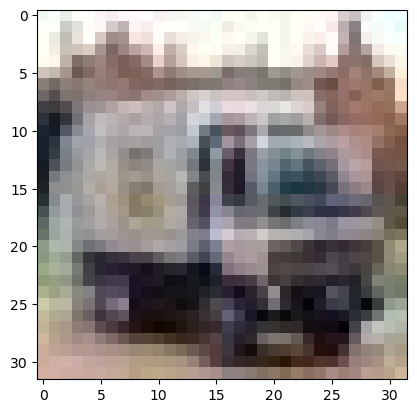

In [7]:
plt.imshow(real_test[0])

In [1]:
import pickle

In [2]:
real_train_file = 'real_train.pkl'
real_test_file = 'real_test.pkl'
fake_train_file = 'fake_train.pkl'
fake_test_file = 'fake_test.pkl'

# Load the lists using pickle.load
with open(real_train_file, 'rb') as f:
    real_train = pickle.load(f)

with open(real_test_file, 'rb') as f:
    real_test = pickle.load(f)

with open(fake_train_file, 'rb') as f:
    fake_train = pickle.load(f)

with open(fake_test_file, 'rb') as f:
    fake_test = pickle.load(f)

In [3]:
def create_dataset(img_list, label):
    images = []
    labels = []
    for img in img_list:
        img_array = np.array(img).flatten()
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_array_real,label_1 = create_dataset(real_train,1)
train_array_fake,label_2 = create_dataset(fake_train,0)
test_array_real,label_3 = create_dataset(real_test,1)
test_array_fake,label_4 = create_dataset(fake_test,0)

In [7]:
train_all = np.concatenate((train_array_real, train_array_fake), axis=0)
train_label = np.concatenate((label_1, label_2), axis=0)
test_all = np.concatenate((test_array_real, test_array_fake), axis=0)
test_label = np.concatenate((label_3, label_4), axis=0)

In [8]:
test_label

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
train_all

array([[169, 169, 181, ..., 132, 128, 119],
       [168, 180, 192, ...,  72,  77,  81],
       [150, 195, 100, ..., 125, 161,  53],
       ...,
       [ 84,  82,  83, ..., 152, 152, 152],
       [ 37,  45,   0, ...,   0,  52,  84],
       [164, 162, 163, ..., 128, 126, 127]], dtype=uint8)

In [10]:
test_all

array([[240, 250, 242, ..., 203, 182, 155],
       [197,  24,   0, ...,  31,  30,  26],
       [ 77,  98,  41, ..., 165, 116, 111],
       ...,
       [ 56,  24,  29, ...,   2,  10,  13],
       [217, 217, 217, ...,  53,  51,  52],
       [100, 151, 206, ...,  90,  84,  84]], dtype=uint8)

In [12]:
train_label

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
def shuffle_img(img_array,labels):
    indices = np.arange(img_array.shape[0])
    np.random.shuffle(indices)
    shuffled_images = img_array[indices]
    shuffled_labels = labels[indices]
    return shuffled_images,shuffled_labels

In [15]:
train_images,train_labels = shuffle_img(train_all,train_label)
test_images,test_labels = shuffle_img(test_all,test_label)

In [16]:
sc = StandardScaler()

In [4]:
X[0]

NameError: name 'X' is not defined

In [17]:
import pandas as pd

In [22]:
df_train_images = pd.DataFrame(train_images)
df_train_labels = pd.DataFrame(train_labels)

In [25]:
df_train_labels

,0
0,1
1,0
2,0
3,0
4,1
...,...
94765,0
94766,1
94767,1
94768,1


In [23]:
df_test_images = pd.DataFrame(test_images)
df_test_labels = pd.DataFrame(test_labels)

In [27]:
df_test_labels

,0
0,1
1,1
2,0
3,0
4,0
...,...
19995,1
19996,0
19997,0
19998,0


In [18]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# model = models.Sequential([
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f'Test Accuracy: {test_acc}')

# # Make predictions
# predictions = model.predict(test_images)

In [33]:
X = sc.fit_transform(train_images)
x_test = sc.fit_transform(test_images)

In [19]:
train_images[0]

array([226, 221, 228, ...,   7,   5,  16], dtype=uint8)

In [30]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=1, activation = 'relu',max_iter=100000,hidden_layer_sizes=(10, 5))
mlp_clf.fit(train_images,train_labels)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=100000, random_state=1)

In [32]:
yp=mlp_clf.predict(test_images)
print(mlp_clf.predict(test_images))
print(mlp_clf.score(test_images, test_labels))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels,yp)
print(cm)

[0 0 0 ... 0 0 0]
0.5
[[10000     0]
 [10000     0]]


In [34]:
X

array([[ 1.6489501 ,  1.48812569,  1.43676371, ..., -1.7280255 ,
        -1.76327402, -1.23142695],
       [-0.49889129, -0.06091139,  0.43514475, ..., -0.84480404,
        -0.19988669,  0.65176525],
       [ 1.30298907,  1.28732459,  1.57278604, ..., -0.0597183 ,
        -0.25031854, -0.19870864],
       ...,
       [-0.31149574, -0.1039402 ,  0.43514475, ...,  0.75807935,
        -0.30075039, -0.19870864],
       [ 0.45250154,  0.16857558, -0.24496689, ..., -0.07607425,
        -0.23350792, -0.38095305],
       [-0.21059044, -0.4625136 , -1.22185451, ...,  0.30011267,
         0.13632564,  0.05947093]])

In [35]:
x_test

array([[ 1.61508123,  1.48177358,  1.43684556, ...,  0.19244994,
         0.34648128,  0.71673142],
       [-0.1330368 , -0.54226386, -0.57658984, ...,  0.78198093,
         0.61571515,  0.54933392],
       [ 0.56907618,  0.14191781, -0.23072364, ...,  2.32131186,
         2.13015568,  1.67546255],
       ...,
       [ 0.31115713,  0.52677   ,  1.17744591, ..., -0.11869142,
         0.54840668,  1.35588551],
       [-1.4369609 , -1.16943039, -1.3918459 , ...,  0.27432924,
         0.61571515, -0.47026904],
       [ 0.95595476,  1.02565246,  1.20215064, ...,  1.06037057,
         0.75033209,  0.62542369]])

In [36]:
mlp_clf2 = MLPClassifier(random_state=1, activation = 'relu',max_iter=100000,hidden_layer_sizes=(10, 5))
mlp_clf2.fit(X,train_labels)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=100000, random_state=1)

In [40]:
yp2=mlp_clf2.predict(x_test)
print(yp2)
print(mlp_clf2.score(x_test, test_labels))
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(test_labels,yp2)
print(cm2)

[1 1 1 ... 0 0 1]
0.79045
[[7964 2036]
 [2155 7845]]


In [38]:
with open('scaled_train_data.pkl', 'wb') as train_data_file:
    pickle.dump(X, train_data_file)

with open('scaled_test_data.pkl', 'wb') as test_data_file:
    pickle.dump(x_test, test_data_file)

In [41]:
normalized_train_images = train_images / 255.0
normalized_test_images = test_images / 255.0

In [43]:
normalized_train_images

array([[0.88627451, 0.86666667, 0.89411765, ..., 0.02745098, 0.01960784,
        0.0627451 ],
       [0.30196078, 0.44313725, 0.57647059, ..., 0.23921569, 0.38431373,
        0.54901961],
       [0.79215686, 0.81176471, 0.9372549 , ..., 0.42745098, 0.37254902,
        0.32941176],
       ...,
       [0.35294118, 0.43137255, 0.57647059, ..., 0.62352941, 0.36078431,
        0.32941176],
       [0.56078431, 0.50588235, 0.36078431, ..., 0.42352941, 0.37647059,
        0.28235294],
       [0.38039216, 0.33333333, 0.05098039, ..., 0.51372549, 0.4627451 ,
        0.39607843]])

In [44]:
normalized_test_images

array([[0.88235294, 0.87058824, 0.89803922, ..., 0.49019608, 0.51372549,
        0.56862745],
       [0.40392157, 0.31372549, 0.25882353, ..., 0.63137255, 0.57647059,
        0.5254902 ],
       [0.59607843, 0.50196078, 0.36862745, ..., 1.        , 0.92941176,
        0.81568627],
       ...,
       [0.5254902 , 0.60784314, 0.81568627, ..., 0.41568627, 0.56078431,
        0.73333333],
       [0.04705882, 0.14117647, 0.        , ..., 0.50980392, 0.57647059,
        0.2627451 ],
       [0.70196078, 0.74509804, 0.82352941, ..., 0.69803922, 0.60784314,
        0.54509804]])

In [47]:
mlp_clf3 = MLPClassifier(random_state=1, activation = 'relu',max_iter=10000,hidden_layer_sizes=(10, 5))
mlp_clf3.fit(normalized_train_images,train_labels)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=100000, random_state=1)

In [48]:
yp3=mlp_clf3.predict(normalized_test_images)
print(yp3)
print(mlp_clf3.score(normalized_test_images, test_labels))
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(test_labels,yp3)
print(cm3)

[1 1 1 ... 0 0 0]
0.74745
[[7837 2163]
 [2888 7112]]
